# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine whether different teaching methods (Direct Instruction, Inquiry-Based Learning, and Collaborative Learning) lead to differences in students’ quiz scores on hypothesis testing. We also want to compare these methods while controlling for students’ prior knowledge (High or Low), since that could influence their performance.

**Question 2.** Specify the outcome variable

The outcome variable in this experiment is the students’ quiz score, measured as a percentage on the 50-question hypothesis testing quiz.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

The independent variable (treatment factor) in this experiment is the teaching method, which has three levels: Direct Instruction, Inquiry-Based Learning, and Collaborative Learning.

The blocking factor is Prior Knowledge, which is categorized as High or Low. We include this as a block because students with different prior knowledge levels may perform differently on the quiz.

Some possible lurking variables could include students’ overall academic ability, motivation level, attendance during the workshop, or differences in how the workshop sessions were delivered. These factors could also influence quiz scores but are not directly controlled in this experiment.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate for this experiment because prior knowledge can strongly affect students’ quiz performance. By blocking students into High and Low prior knowledge groups, we can control for this source of variation and make a fairer comparison of the teaching methods. This helps reduce unexplained variability and gives a more accurate estimate of the treatment effect.

A completely randomized design would not be appropriate here because it would ignore prior knowledge. If students with high prior knowledge happened to be unevenly distributed across teaching methods, it could bias the results. Blocking helps prevent this issue and allows us to compare the teaching methods more reliably.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypothesis (H0): The mean quiz scores are the same for all three teaching methods (Direct Instruction, Inquiry-Based Learning, and Collaborative Learning), after controlling for prior knowledge.

Alternative hypothesis (HA): At least one teaching method has a different mean quiz score compared to the others, after controlling for prior knowledge.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Data Science Teaching Method.xlsx")

df.info()
print(df) # Prints entire DF so that we could check all those values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prior_Knowledge  60 non-null     object 
 1   Teaching_Method  60 non-null     object 
 2   Score            60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB
   Prior_Knowledge Teaching_Method   Score
0              Low          Direct   77.99
1              Low          Direct   76.89
2              Low          Direct   71.19
3              Low          Direct   81.23
4              Low          Direct   73.97
5              Low          Direct   69.18
6              Low          Direct   71.70
7              Low          Direct   81.82
8              Low          Direct   69.28
9              Low          Direct   62.49
10             Low         Inquiry   82.40
11             Low         Inquiry   78.75
12             Low         Inquiry   86.23
13            

In [2]:
df.groupby("Teaching_Method")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Teaching_Method,,,,,,,,
Collaborative,20.0,87.1000,7.414661,70.47,83.3825,87.665,91.9150,101.29
Direct,20.0,77.4915,7.264446,62.49,72.5625,77.440,81.3775,93.11
Inquiry,20.0,82.1145,7.037525,71.40,75.4225,82.355,88.2825,93.90


In [3]:
df.groupby("Prior_Knowledge")["Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Prior_Knowledge,,,,,,,,
High,30.0,85.805667,6.894495,72.85,80.9525,86.425,91.0875,101.29
Low,30.0,78.665000,7.809350,62.49,73.4175,77.440,83.6950,97.06


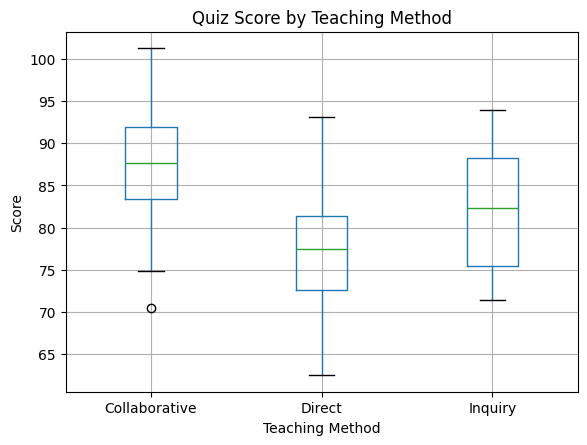

In [4]:
df.boxplot(column="Score", by="Teaching_Method")
plt.title("Quiz Score by Teaching Method")
plt.suptitle("")
plt.xlabel("Teaching Method")
plt.ylabel("Score")
plt.show()

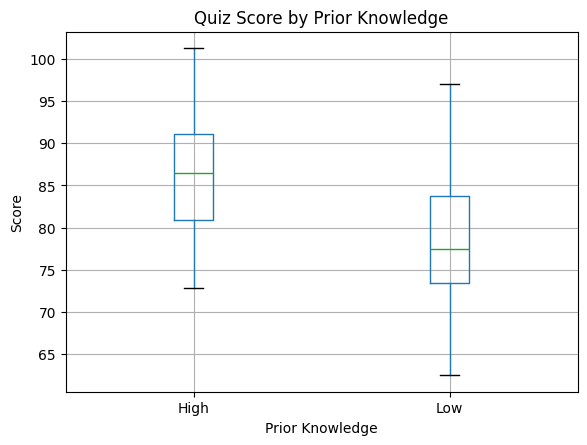

In [5]:
df.boxplot(column="Score", by="Prior_Knowledge")
plt.title("Quiz Score by Prior Knowledge")
plt.suptitle("")
plt.xlabel("Prior Knowledge")
plt.ylabel("Score")
plt.show()

First, I checked the dataset using df.info() and by printing the rows. The dataset has 60 observations and 3 columns (Prior_Knowledge, Teaching_Method, and Score). Score is numeric and there are no missing values.

From the summary statistics by teaching method, the average quiz scores are different across the three methods. Collaborative Learning has the highest mean score (87.10) with a median of about 87.67. Inquiry-Based Learning is next with a mean of about 82.11 and a median of about 82.36. Direct Instruction has the lowest mean score (77.49) with a median of about 77.44. Also, the middle 50% ranges (IQRs) show the same pattern: Collaborative is mostly around 83.38 to 91.92, Inquiry is around 75.42 to 88.28, and Direct is around 72.56 to 81.38.

For the blocking factor (Prior Knowledge), students in the High group score higher overall than students in the Low group. The High group has a mean of about 85.81 and median about 86.43, while the Low group has a mean of about 78.67 and median about 77.44.

The boxplot by teaching method matches the summary table: Collaborative has the highest center, Inquiry is in the middle, and Direct is lowest. There is overlap, but the medians are clearly separated, especially between Collaborative and Direct.

The boxplot by prior knowledge also shows a clear shift upward for the High group compared to the Low group. The High group has a higher median and overall distribution, while the Low group is centered lower. This visual difference supports the idea that prior knowledge affects quiz score and is a good reason to use it as a blocking variable.

Overall, based on the summary statistics and both boxplots, the exploratory results support the alternative hypothesis more than the null (teaching method likely affects mean quiz score). However, we still need the two-way ANOVA to confirm this formally while controlling for prior knowledge.

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

# Two-way ANOVA (additive model for RBD)
model = ols("Score ~ C(Teaching_Method) + C(Prior_Knowledge)", data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Teaching_Method),923.670743,2.0,11.632036,0.000060
C(Prior_Knowledge),764.836807,1.0,19.263595,0.000051
Residual,2223.409543,56.0,NaN,NaN


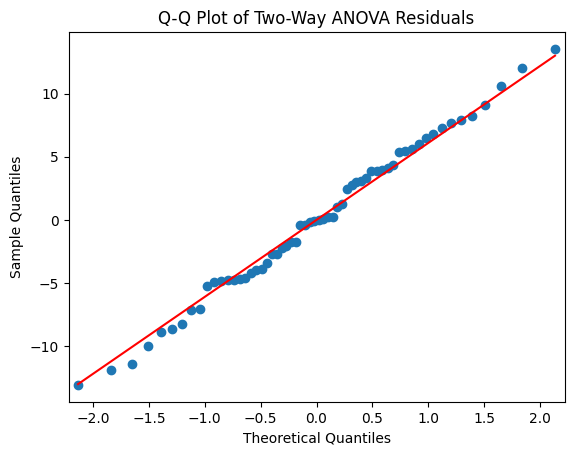

In [7]:
residuals = model.resid

sm.qqplot(residuals, line="s")
plt.title("Q-Q Plot of Two-Way ANOVA Residuals")
plt.show()

In [8]:
shapiro_stat, shapiro_p = stats.shapiro(residuals)
shapiro_stat, shapiro_p

(np.float64(0.9893192280271398), np.float64(0.8794000184343089))

A two-way ANOVA model was fit with Score as the response variable, Teaching_Method as the treatment factor, and Prior_Knowledge as the blocking factor.

To check the normality assumption, I examined a Q-Q plot of the model residuals. The points follow the reference line closely, with only very small deviations at the extreme ends, which suggests the residuals are approximately normal. I also performed a Shapiro-Wilk test on the residuals and obtained a p-value of about 0.879. Since this is greater than 0.05, we fail to reject the null hypothesis of normality.

Overall, both the Q-Q plot and the Shapiro-Wilk test support the assumption of normality for this two-way ANOVA model.

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



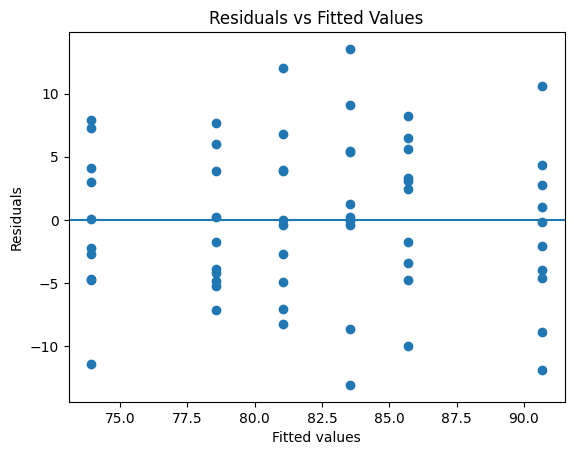

In [9]:
fitted = model.fittedvalues
residuals = model.resid

plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, model.model.exog)
bp_stat, bp_pvalue

(np.float64(2.341194371999711), np.float64(0.5046751257948525))


First, I examined the residuals vs fitted values plot. The residuals are scattered around 0 across the range of fitted values, and there is no clear funnel shape (meaning the spread does not consistently get wider or narrower as fitted values increase). Even though there are a few larger positive and negative residuals, the overall vertical spread looks fairly similar at different fitted values.

Next, I used the Breusch–Pagan test to formally test constant variance. The Breusch–Pagan p-value is about 0.505, which is greater than 0.05. So we fail to reject the null hypothesis of constant variance.

Based on both the residuals vs fitted plot and the Breusch–Pagan test, the homogeneity of variance assumption appears to be satisfied for this model.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



From the two-way ANOVA table, the F-statistic for the treatment effect (Teaching_Method) is approximately 11.63, with a p-value of about 0.0000596.

Since this p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. This provides strong evidence that at least one teaching method has a different mean quiz score after controlling for prior knowledge.

Therefore, the alternative hypothesis is more strongly supported by the data.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df["Score"],
    groups=df["Teaching_Method"],
    alpha=0.05
)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -9.6085 0.0003 -15.1184 -4.0986   True
Collaborative Inquiry  -4.9855 0.0838 -10.4954  0.5244  False
       Direct Inquiry    4.623 0.1168  -0.8869 10.1329  False
-------------------------------------------------------------


Since the two-way ANOVA showed a significant treatment effect, Tukey’s HSD post-hoc test was performed to compare the teaching methods pairwise.

The Tukey results show that Collaborative Learning and Direct Instruction are significantly different (p = 0.0003). Specifically, Collaborative has a higher mean score than Direct.

However, there is no statistically significant difference between Collaborative Learning and Inquiry-Based Learning (p = 0.0838), and there is also no significant difference between Direct Instruction and Inquiry-Based Learning (p = 0.1168).

Overall, the only clear difference is between Collaborative and Direct. This suggests that Collaborative Learning performs significantly better than Direct Instruction, while Inquiry-Based Learning is not significantly different from either of the other two methods.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

In this experiment, we compared three teaching methods (Direct Instruction, Inquiry-Based Learning, and Collaborative Learning) to determine whether they produce different quiz scores on hypothesis testing, while controlling for students’ prior knowledge.

The two-way ANOVA results showed that teaching method has a statistically significant effect on quiz score (F ≈ 11.63, p < 0.001). Prior knowledge was also statistically significant (F ≈ 19.26, p < 0.001), confirming that students with High prior knowledge tend to score higher than those with Low prior knowledge. This supports the decision to use a randomized block design.

The Tukey post-hoc test showed that Collaborative Learning leads to significantly higher scores than Direct Instruction. However, Inquiry-Based Learning was not significantly different from either Collaborative Learning or Direct Instruction.

One limitation of this study is that it was conducted using only one workshop session for each method, and the sample size was relatively small (60 students total). Other factors such as instructor delivery style, student motivation, or differences in workshop environment could also influence quiz scores.

For future research, it would be helpful to increase the sample size, repeat the study across multiple semesters, and possibly include additional measures of student understanding. Overall, the results suggest that Collaborative Learning may be more effective than Direct Instruction for teaching hypothesis testing concepts.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine whether the four online learning platforms (A, B, C, and D) differ in terms of student engagement, measured by the total number of logins. At the same time, we want to compare the platforms while controlling for possible differences due to Day of the Week and Time of Day, since those factors could also affect engagement.

**Question 2.** Specify the outcome variable

The outcome variable in this experiment is student engagement, measured as the total number of logins to the online learning platform for each course section over the semester.

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

The independent variable (treatment factor) in this experiment is the online learning platform, which has four levels: A, B, C, and D.

The blocking factors are Day of the Week (Monday, Tuesday, Wednesday, Thursday) and Time of Day / Section (Morning, Early Afternoon, Mid-Afternoon, Evening). We treat these as blocks because engagement may naturally differ by day or by time slot, even if the platform stays the same.

Some other possible lurking variables could include differences in instructor style, difficulty of the material covered that week, student workload from other classes, internet/technical issues, or differences in the types of students who choose certain time sections.

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

A Latin Square Design is appropriate for this experiment because we have one main treatment factor (Platform) and two potential nuisance variables (Day of the Week and Time of Day / Section). Since both Day and Section could affect student engagement, we want to control for both at the same time. The Latin Square Design allows each platform to appear exactly once in each day and once in each section, which helps balance and control these two sources of variation.

A completely randomized design would not be appropriate because it would ignore differences due to Day and Section, which could increase variability and make the platform comparison less accurate.

A randomized block design would also not be sufficient because it can only control for one blocking factor, while this experiment has two (Day and Section). The Latin Square Design is more suitable because it allows us to control both blocking factors simultaneously.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypothesis (H0): The mean student engagement (number of logins) is the same for all four online learning platforms (A, B, C, and D), after controlling for Day of the Week and Time of Day.

Alternative hypothesis (HA): At least one online learning platform has a different mean student engagement compared to the others, after controlling for Day of the Week and Time of Day.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_excel("Online Learning and Engagement.xlsx")

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         16 non-null     object 
 1   Section     16 non-null     object 
 2   Platform    16 non-null     object 
 3   Engagement  16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes


,Day,Section,Platform,Engagement
0,Monday,Morning,A,1393.29
1,Monday,Early Afternoon,B,1381.97
2,Monday,Mid Afternoon,C,1317.04
3,Monday,Evening,D,1376.20
4,Tuesday,Morning,B,1359.92


In [14]:
df2.groupby("Platform")["Engagement"].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
A,4.0,1408.8475,19.319733,1393.29,1398.2025,1402.620,1413.2650,1436.86
B,4.0,1339.7200,39.845434,1290.89,1317.2975,1343.010,1365.4325,1381.97
C,4.0,1332.6425,32.288451,1297.85,1312.2425,1330.335,1350.7350,1372.05
D,4.0,1379.0225,7.354601,1370.68,1374.8200,1378.730,1382.9325,1387.95


In [15]:
df2.groupby("Day")["Engagement"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Monday,4.0,1367.1250,34.136218,1317.04,1361.4100,1379.085,1384.8000,1393.29
Thursday,4.0,1343.8500,58.047889,1290.89,1296.1100,1339.555,1387.2950,1405.40
Tuesday,4.0,1379.9400,17.542544,1359.92,1369.0175,1380.000,1390.9225,1399.84
Wednesday,4.0,1369.3175,48.619083,1326.10,1339.2475,1357.155,1387.2250,1436.86


In [16]:
df2.groupby("Section")["Engagement"].describe()

,count,mean,std,min,25%,50%,75%,max
Section,,,,,,,,
Early Afternoon,4.0,1382.5250,16.058262,1370.68,1371.7075,1377.010,1387.8275,1405.40
Evening,4.0,1349.9975,46.408685,1297.85,1319.0375,1351.150,1382.1100,1399.84
Mid Afternoon,4.0,1358.1850,66.576369,1290.89,1310.5025,1352.495,1400.1775,1436.86
Morning,4.0,1369.5250,22.100471,1343.63,1355.8475,1370.590,1384.2675,1393.29


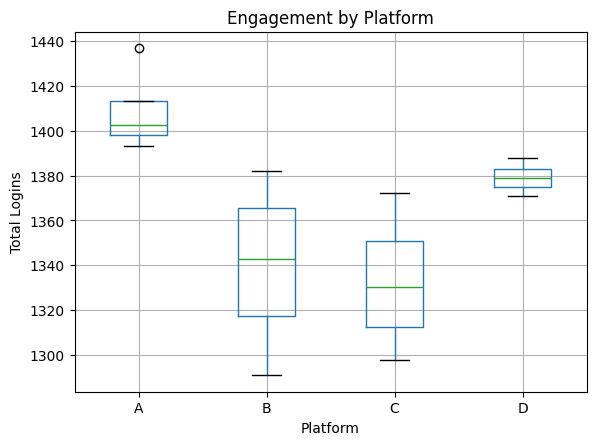

In [17]:
df2.boxplot(column="Engagement", by="Platform")
plt.title("Engagement by Platform")
plt.suptitle("")
plt.xlabel("Platform")
plt.ylabel("Total Logins")
plt.show()

First, I checked the dataset using df2.info() and printed a few rows. The dataset has 16 observations and 4 columns: Day, Section, Platform, and Engagement. Engagement is numeric and there are no missing values. This matches the 4×4 Latin Square setup (4 days × 4 sections = 16 total measurements).

From the summary statistics by platform, the average engagement differs across the four platforms. Platform A has the highest mean engagement (about 1408.85) and Platform D is next (about 1379.02). Platforms B and C have lower mean engagement (about 1339.72 for B and 1332.64 for C). Platform D also has a very small standard deviation (about 7.35), meaning D is more consistent, while B and C vary more (std about 39.85 and 32.29).

The boxplot of engagement by platform matches these numbers. Platform A has the highest center (median around 1402.62) and also shows one high value near 1436.86. Platform D is the next highest with a tight box and whiskers (median around 1378.73), showing very consistent engagement. Platforms B and C have lower centers (medians around 1343.01 for B and 1330.34 for C) and wider spreads than D.

Looking at the blocking factors, the mean engagement also changes by Day and by Section. For Day, Tuesday has the highest mean (about 1379.94), while Thursday has the lowest mean (about 1343.85). For Section, Early Afternoon has the highest mean (about 1382.53), while Evening has the lowest mean (about 1350.00). This shows Day and Section can affect engagement, which supports why they should be controlled for in the Latin Square design.

Overall, based on the platform means and the platform boxplot, the exploratory results suggest that engagement is not the same across platforms (A and D look higher than B and C). So the EDA supports the alternative hypothesis more than the null. However, we still need the Latin Square ANOVA model to confirm whether the platform differences are statistically significant after controlling for Day and Section.

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.